In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
IMAGE_SIZE = [224, 224]

train_data_dir = 'gdrive/My Drive/Kaggle/data/train'
validation_data_dir = 'gdrive/My Drive/Kaggle/data/validation'

In [4]:
xcept = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in xcept.layers:
  layer.trainable = False

83689472/83683744 [==============================] - 1s 0us/step


In [5]:
folders = glob('gdrive/My Drive/Kaggle/data/train/*')
print(len(folders))

2


In [6]:
# our layers - you can add more if you want
x = Flatten()(xcept.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
model = Model(inputs=xcept.input, outputs=prediction)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [11]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
64/64 [==============================] - 1430s 22s/step - loss: 0.4509 - accuracy: 0.9453 - val_loss: 0.3287 - val_accuracy: 0.9832
Epoch 2/5
64/64 [==============================] - 576s 9s/step - loss: 0.2585 - accuracy: 0.9829 - val_loss: 0.2740 - val_accuracy: 0.9868
Epoch 3/5
64/64 [==============================] - 575s 9s/step - loss: 0.1769 - accuracy: 0.9888 - val_loss: 0.2429 - val_accuracy: 0.9868
Epoch 4/5
64/64 [==============================] - 575s 9s/step - loss: 0.2130 - accuracy: 0.9849 - val_loss: 0.2313 - val_accuracy: 0.9868
Epoch 5/5
64/64 [==============================] - 576s 9s/step - loss: 0.0992 - accuracy: 0.9941 - val_loss: 0.3088 - val_accuracy: 0.9832


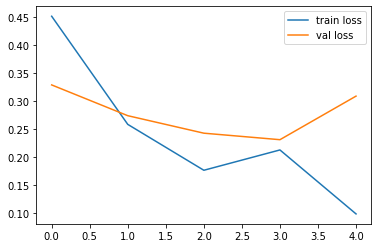

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

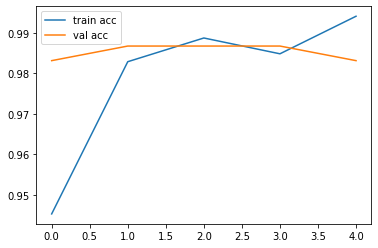

In [13]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()